# League of Legends Item Balancing

The overarching question: How would a developer for this game know when they need to change an item?

This is the notebook for the Exploratory Data Analysis for this capstone project.

## Data

Champions: This is information on the playable characters in the game. 

Items: This is information on the purchasable items in the game.

Match Data: This is information on games themselves, including played champions, final items bought, when the final items were bought, etc. 

In [260]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
%matplotlib inline

C:\Users\sebia\Miniconda2\envs\tutorial\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


### Load in Data

In [319]:
matches_df = pd.read_csv('match_data_2.csv', encoding='utf-8', index_col=0)
matches_df.head(1)

,championId,highestAchievedSeasonTier,item0_time,item1_time,item2_time,item3_time,item4_time,item5_time,item6_time,masteries,...,timeline.participantId,timeline.role,timeline.xpDiffPerMinDeltas.0-10,timeline.xpDiffPerMinDeltas.10-20,timeline.xpDiffPerMinDeltas.20-30,timeline.xpDiffPerMinDeltas.30-end,timeline.xpPerMinDeltas.0-10,timeline.xpPerMinDeltas.10-20,timeline.xpPerMinDeltas.20-30,timeline.xpPerMinDeltas.30-end
0,103,SILVER,1442408,1317001,1097684,NaN,1955521,1859933,NaN,NaN,...,1,DUO_CARRY,-19.3,-24.55,-50.25,NaN,332.5,458.8,424.8,NaN


In [320]:
champions_min_df = pd.read_csv('champions_min_8.22.1.csv', encoding='utf-8', index_col=0)
champions_min_df.head(1)

,name,id,key,tags,info.attack,info.defense,info.difficulty,info.magic
champion_name,,,,,,,,
MonkeyKing,Wukong,MonkeyKing,62,"[Fighter, Tank]",8,5,3,2


In [321]:
items_df = pd.read_csv('items.8.22.1.csv', encoding='utf-8', index_col=0)
items_df['tags'] = [re.findall('[A-Za-z]\w*', items_df.loc[item_id, 'tags']) for item_id in items_df.index]
items_df.head(1)

,name,description,consumed,base_gold,depth,sr,effect1amount,effect2amount,effect3amount,effect4amount,...,flat_hp_regen_mod,flat_magic_dmg_mod,flat_ms_mod,flat_phys_dmg_mod,flat_spellblock_mod,flat_pct_atk_speed_mod,pct_lifesteal_mod,pct_movespeed_mod,tags,full_item
item_id,,,,,,,,,,,,,,,,,,,,,
1001,Boots of Speed,<groupLimit>Limited to 1 pair of boots.</group...,0,300,0,True,0,0,0,0,...,0,0,25,0,0,0,0,0,[Boots],False


In [322]:
item_occ = pd.read_csv('item_occurrences_8.22.1.csv', encoding='utf-8', index_col=0)
item_occ = item_occ.join(items_df[['name', 'full_item', 'total_gold', 'tags']])
item_occ.head(1)

,count,pick_rate,spread,wins,win_rate,name,full_item,total_gold,tags
item_id,,,,,,,,,
0,5659,0.611784,141,2400,0.424103,NaN,NaN,NaN,NaN


In [323]:
tag_based_stats_df = pd.read_csv('tag_based_stats_8.22.1.csv', encoding='utf-8', index_col=0)
tag_based_stats_df.head(1)

,tag,pick_count,avg_pick_rate,avg_win_rate,avg_champ_spread,avg_item_cost
0,CooldownReduction,12141,0.054525,0.526563,30.617021,2367.723404


In [324]:
timing_df = pd.read_csv('item_timing_8.22.1.csv', encoding='utf-8', index_col=0)
timing_df.head(1)

,item_id,purchase_time,win,name,full_item,total_gold,tags
0,1001,983808,False,Boots of Speed,False,300,[Boots]


# Inferential Statistics Questions


## What are the variables most relevant to the final question?

In order: win rate, pick rate, champion spread. 

Win Rate is the easier Bernoulli variable to determine performance. A win rate that deviates considerably from the norm will indicate a poorly balanced item, and suggest that the item be changed. Items with low win rates should be stronger, and items with high win rates should be weaker.

Pick Rate is almost a Bernoulli variable (if I divide it by 7, it will be. This is because there are 7 item slots, which influenced how I did the original calculation). High pick rates indicate a relative popularity of an item, and may indicate what appears to be strong. Items with pick rates that are too high make the game stale, and should be weaker. Similarly, if many items aren't picked much at all, then the variety they bring to the game is nonexistent, and they should be stronger. Some of this has to do with the game meta, or what players feel is the most viable strategy for most games.

Champion Spread is a measure of how many unique champions build an item. It could be turned into the proportion of champions that build each item by dividing by 141. It is related to Pick Rate, as it is more likely that an item gets built if many different champions can build it and have a decent chance of winning. This variable should be paired with tags to see if there are lots of unexpected champions building items.

## Are there strong correlations between pairs of independent variables or between an independent and a dependent variable?

Pick rate and champion spread.

Win rate and item cost (only if I include incomplete items. The set of full items has much less correlation between these two).

## What are the most appropriate tests to use to analyse these relationships?

Z-test for the proportion of wins (win rate) vs the mean.

Z-test for the proportion of picks (pick rate) vs the mean?

## To Do

(DONE) Fix Final Item column for Ornn special items.

(DONE) Establish mean win rate of all finished item.

## Potential Hypothesis Tests

### Use alpha = 0.05

(DONE) The win rate of each item is the same (establish mean of finished items, then compare to that).

(DONE) The win rate of each tag is the same (compare to mean found earlier).

(DONE) High win rate correlates with high pick rate. (not a test tho?)

(DONE) High pick rate correlates with high champion spread. (not a test tho?)

Building items earlier increases your win rate (power spike) (probably easier to do with Machine Learning).

Items with high champion spread (especially with champions outside the normal tag) are too powerful.

## Notes

Probably won't include boots, trinkets, in the analysis. Could maybe do a small analysis on peripheral tags.



Cut out consumables, lane items, boots, trinkets, and other edge case items I don't want in the analysis.

In [185]:
consumable = [True if (type(tags) == list and 'Consumable' in tags) else False for tags in item_occ['tags']]

lane_items = [True if (type(tags) == list and 'Lane' in tags) else False for tags in item_occ['tags']]

boots = [True if (type(tags) == list and 'Boots' in tags) else False for tags in item_occ['tags']]

trinkets = [True if (type(tags) == list and 'Trinket' in tags) else False for tags in item_occ['tags']]

other_no_no_ids = [2010, 2057, 2403]
other_edge_cases = [True if id in other_no_no_ids else False for id in item_occ.reset_index()['item_id']]

edge_cases = [cons or lane or other or boot or trinket for cons, lane, other, boot, trinket in
              zip(consumable, lane_items, other_edge_cases, boots, trinkets)]
no_edge_cases = [not case for case in edge_cases]

In [186]:
item_occ[other_edge_cases]

,count,pick_rate,spread,wins,win_rate,name,full_item,total_gold,tags
item_id,,,,,,,,,
2010,52,0.005622,27,18,0.346154,Total Biscuit of Everlasting Will,True,75,[]
2057,6,0.000649,2,1,0.166667,Peering Farsight Ward,True,60,"[Vision, Active]"
2403,18,0.001946,14,8,0.444444,Minion Dematerializer,True,0,[]


other_no_nos: the Biscuit, Peering Ward, or Dematerializer

Found that none of the items found in only 5-10 games were relevant to my analysis (Kleptomancy rewards, lane items), so I set the cutoff there. Include weight for win rates.

0.547 is the average win rate for the set of relevant full items. It is expected to be above 50% because incomplete items in a player's final inventory indicate a disadvantage, and thus a lower win rate.

In [203]:
full_items_df = item_occ[(item_occ['full_item'] == True) &
                         (no_edge_cases) &
                         (item_occ['count'] > 10)]

full_item_avg_win_rate = (full_items_df['win_rate'] * full_items_df['count']).sum() / full_items_df['count'].sum()
full_item_avg_win_rate

0.54733688708758366

### Win Rate vs Item ID

Only the relevant full items are considered here. The dotted red line is this set's average win rate of 0.547.

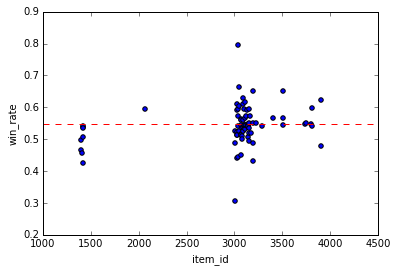

In [204]:
item_occ[(item_occ['full_item'] == True) &
         (no_edge_cases) &
         (item_occ['count'] > 10)].reset_index().plot(y='win_rate', x='item_id', kind='scatter',
                                                     xlim=[1000, 4500])

plt.plot(np.linspace(1000, 4500, 50), np.full(50, full_item_avg_win_rate), 'r--')

### Test: The win rate of each item is the same (establish mean of finished items, then compare to that).

I build a new table to compute the difference of win rate from the mean win rate, and the standard deviation based on the win rate's status as a Bernoulli variable. I also compute the 95% confidence interval of the true win rate for each item, so I can see if it's win rate falls within an expected range.

In [205]:
wr_stats_df = item_occ[['count', 'pick_rate', 'spread', 'wins', 'win_rate', 'full_item']]
wr_stats_df['wr_diff'] = wr_stats_df['win_rate'] - full_item_avg_win_rate

C:\Users\sebia\Miniconda2\envs\tutorial\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


We are using an artificial population mean (idk if that is a bad idea, but it speeds up analyis) in full_item_avg_win_rate.

I can take each items' win rate's standard deviation to be sqrt(p * (1 - p) / n).

In [298]:
wr_stats_df['wr_std'] = np.sqrt(full_item_avg_win_rate * (1 - full_item_avg_win_rate) 
                                / wr_stats_df['count'])
wr_stats_df['CI95'] = wr_stats_df['wr_std'] * 1.96

In [299]:
wr_stats_df.head()

,count,pick_rate,spread,wins,win_rate,full_item,wr_diff,wr_std,CI95
item_id,,,,,,,,,
0,5659,0.611784,141,2400,0.424103,NaN,-0.123234,0.006617,0.012969
1001,459,0.049622,113,159,0.346405,False,-0.200932,0.023233,0.045537
1004,78,0.008432,23,28,0.358974,False,-0.188363,0.056360,0.110465
1006,46,0.004973,27,18,0.391304,False,-0.156033,0.073390,0.143844
1011,269,0.029081,70,129,0.479554,False,-0.067783,0.030349,0.059483


The 95% confidence interval is set with z-scores +/- 1.96. The table below shows the items with win rates more than 1.96 standard deviations (CI95) from the average full-item win rate. Items with a negative wr_diff are too weak, and items with a positive wr_diff are too strong.

Bar graph of wr_diff, maybe normalized by std, for items outside the 95% CI

In [208]:
wr_stats_df[(wr_stats_df['full_item'] == True) &
            (no_edge_cases) &
            (wr_stats_df['count'] > 10) &
            (wr_stats_df['wr_diff'].abs() > wr_stats_df['CI95'])].join(items_df[['name', 'total_gold', 'tags']])

,count,pick_rate,spread,wins,win_rate,full_item,wr_diff,wr_std,CI95,name,total_gold,tags
item_id,,,,,,,,,,,,
1401,215,0.023243,26,100,0.465116,True,-0.082221,0.033947,0.066535,Enchantment: Cinderhulk,2500,[]
1402,180,0.019459,23,82,0.455556,True,-0.091781,0.037100,0.072717,Enchantment: Runic Echoes,2625,[]
1413,106,0.011459,22,45,0.424528,True,-0.122809,0.048346,0.094758,Enchantment: Cinderhulk,2500,[]
3026,503,0.054378,60,307,0.610338,True,0.063001,0.022194,0.043500,Guardian Angel,2800,"[Armor, Damage]"
3031,697,0.075351,25,412,0.591105,True,0.043768,0.018854,0.036953,Infinity Edge,3400,"[CriticalStrike, Damage]"
3041,123,0.013297,45,98,0.796748,True,0.249411,0.044881,0.087967,Mejai's Soulstealer,1400,"[SpellDamage, Mana]"
3042,151,0.016324,4,67,0.443709,True,-0.103628,0.040507,0.079393,Muramana,2400,[OnHit]
3050,140,0.015135,19,93,0.664286,True,0.116949,0.042068,0.082453,Zeke's Convergence,2250,"[SpellBlock, Armor, Mana, Aura, Active, Cooldo..."
3053,399,0.043135,41,241,0.604010,True,0.056673,0.024919,0.048841,Sterak's Gage,3200,"[Health, Damage]"


### Test: High win rate correlates with high pick rate.

This is inconclusive. The Pearson correlation coefficient for these values is 0.08. It seems as though more popular items tend to get built by both teams, and bring the win rate closer to 50%.

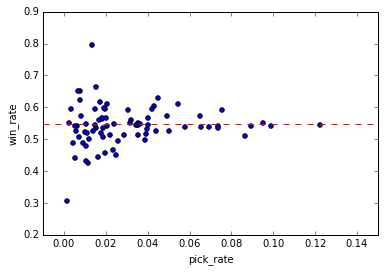

In [209]:
item_occ[(item_occ['full_item'] == True) &
         (no_edge_cases) &
         (item_occ['count'] > 10)].plot(x='pick_rate', y='win_rate', kind='scatter',
                                        xlim=[-0.01, 0.15])

plt.plot(np.linspace(-0.01, 0.15, 50), np.full(50, full_item_avg_win_rate), 'r--')

In [210]:
item_occ[(item_occ['full_item'] == True) &
         (no_edge_cases) &
         (item_occ['count'] > 10)].corr()#['pick_rate']['win_rate']

,count,pick_rate,spread,wins,win_rate,total_gold
count,1.000000,1.000000,0.468617,0.996159,0.082005,0.212334
pick_rate,1.000000,1.000000,0.468617,0.996159,0.082005,0.212334
spread,0.468617,0.468617,1.000000,0.490501,0.313821,0.241223
wins,0.996159,0.996159,0.490501,1.000000,0.146090,0.222702
win_rate,0.082005,0.082005,0.313821,0.146090,1.000000,0.024651
total_gold,0.212334,0.212334,0.241223,0.222702,0.024651,1.000000


In [211]:
item_occ[(item_occ['full_item'] == True) &
         (no_edge_cases) &
         (item_occ['count'] > 10)].corr()['pick_rate']['win_rate']

0.082004789435989947

### Test: High pick rate correlates with high champion spread.

This makes sense. Correlation coefficient of 0.468.

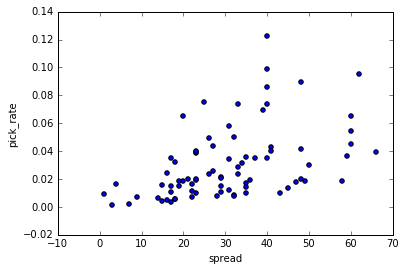

In [212]:
item_occ[(item_occ['full_item'] == True) &
         (no_edge_cases) &
         (item_occ['count'] > 10)].plot(x='spread', y='pick_rate', kind='scatter')

In [213]:
item_occ[(item_occ['full_item'] == True) &
         (no_edge_cases) &
         (item_occ['count'] > 10)].corr()['pick_rate']['spread']

0.46861675636655714

### Test: Win Rate correlates with item cost

Not really. Correlation coefficient is only 0.025

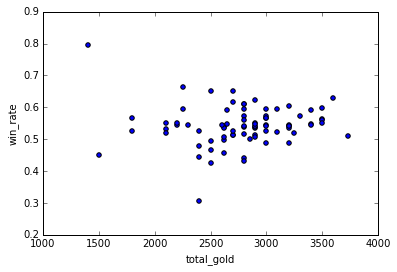

In [214]:
item_occ[(item_occ['full_item'] == True) &
         (no_edge_cases) &
         (item_occ['count'] > 10)].plot(x='total_gold', y='win_rate', kind='scatter')

In [215]:
item_occ[(item_occ['full_item'] == True) &
         (no_edge_cases) &
         (item_occ['count'] > 10)].corr()['total_gold']['win_rate']

0.024650911115836106

### Jungle Item Win Rate Conundrum

Generally, one person on each team is a Jungler, and will buy 1 Jungle item (particularly in the item_id range around 2500-2600). If one of these items is built per team per game, I would expect the full Jungle items to sit evenly around the average win rate.

However, all the jungle items have a win rate that is on par with or below the full item avg win rate. Actually, the win rate seems to sit around 0.50. Since one player per team per game jungles, and makes a jungle item, the overall win rate for full jungle items should sit around 0.50. Incomplete jungle items are uncommon, since a player will only build 1 full jungle item, and it is generally completed first.

(Probably not) This suggests that junglers win more games by either never completing their jungle item (and building a normal item instead) or by selling it and buying a different item late game.

More statistics in the table below.

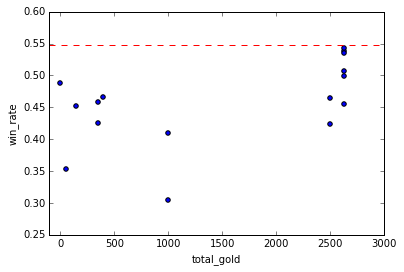

In [246]:
no_name = [True if type(name) == float else False for name in item_occ.name]
named = [not name for name in no_name]
named_items = item_occ[named]

jungle = [True if (type(tags) == list and 'Jungle' in tags) else False for tags in named_items['tags']]
named_items[(((named_items.name.str.contains('Enchantment'))) | (jungle)) &
            (named_items['count'] > 5)].plot(x='total_gold', y='win_rate', kind='scatter',
                                         xlim=[-100, 3000])

plt.plot(np.linspace(-100, 3000, 50), np.full(50, full_item_avg_win_rate), 'r--')

In [247]:
named_items[(((named_items.name.str.contains('Enchantment'))) | (jungle)) &
            (named_items['count'] > 5)].sort_values('win_rate', ascending=False)

,count,pick_rate,spread,wins,win_rate,name,full_item,total_gold,tags
item_id,,,,,,,,,
1414,59,0.006378,14,32,0.542373,Enchantment: Runic Echoes,True,2625,[]
1412,535,0.057838,31,288,0.538318,Enchantment: Warrior,True,2625,[]
1419,142,0.015351,15,76,0.535211,Enchantment: Bloodrazor,True,2625,[]
1416,65,0.007027,9,33,0.507692,Enchantment: Bloodrazor,True,2625,[]
1400,359,0.038811,23,179,0.498607,Enchantment: Warrior,True,2625,[]
3340,5270,0.569730,141,2573,0.488235,Warding Totem (Trinket),True,0,"[Active, Jungle, Lane, Trinket, Vision]"
2032,45,0.004865,27,21,0.466667,Hunter's Potion,True,400,"[HealthRegen, ManaRegen, Consumable, Active, J..."
1401,215,0.023243,26,100,0.465116,Enchantment: Cinderhulk,True,2500,[]
1039,24,0.002595,11,11,0.458333,Hunter's Talisman,False,350,"[LifeSteal, ManaRegen, OnHit, Jungle]"


### Test: The win rate of each tag is the same (compare to mean found earlier)

In [312]:
tag_based_stats_df['std_win_rate'] = np.sqrt(full_item_avg_win_rate * (1 - full_item_avg_win_rate) 
                                             / tag_based_stats_df['pick_count'])
tag_based_stats_df.sort_values('avg_win_rate', ascending=False)

,tag,pick_count,avg_pick_rate,avg_win_rate,avg_champ_spread,avg_item_cost,std_win_rate
12,MagicPenetration,1171,0.044507,0.564475,38.800000,2830.000000,0.014546
16,Aura,896,0.022645,0.560268,25.833333,2500.000000,0.016629
13,CriticalStrike,3375,0.064845,0.550519,25.750000,2375.000000,0.008568
18,Vision,679,0.073405,0.541973,33.000000,2900.000000,0.019102
17,SpellDamage,9634,0.047188,0.538821,34.756757,2194.189189,0.005071
19,ArmorPenetration,2981,0.080383,0.536397,25.400000,2430.000000,0.009117
3,Damage,11421,0.060422,0.534629,32.972973,2451.567568,0.004658
15,Mana,4296,0.046418,0.532821,25.750000,2282.625000,0.007594
14,OnHit,8317,0.070238,0.532644,25.307692,2441.653846,0.005458
2,Armor,5382,0.040696,0.532516,41.666667,2068.750000,0.006785


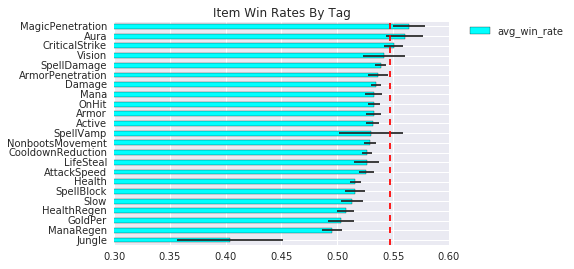

In [318]:
_ = tag_based_stats_df.sort_values('avg_win_rate',
                                   ascending=True).plot(y='avg_win_rate', kind='barh', xerr='std_win_rate',
                                                         xlim=[0.3, 0.6], title='Item Win Rates By Tag', color='cyan')

locs, labels = plt.yticks()
_ = plt.yticks(locs, list(tag_based_stats_df.sort_values('avg_win_rate', ascending=True).tag))
_ = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

_ = plt.axvline(full_item_avg_win_rate, color='red', linestyle='--')

This seems less relevant. I think the standard deviations are too small because the counts are large.

In [311]:
tag_based_stats_df[(tag_based_stats_df['avg_win_rate']
                    - full_item_avg_win_rate).abs() > 1.96 * tag_based_stats_df['std_win_rate']].sort_values('avg_win_rate',
                                                                                                            ascending=False)

,tag,pick_count,avg_pick_rate,avg_win_rate,avg_champ_spread,avg_item_cost,std_win_rate
3,Damage,11421,0.060422,0.534629,32.972973,2451.567568,0.004658
14,OnHit,8317,0.070238,0.532644,25.307692,2441.653846,0.005458
2,Armor,5382,0.040696,0.532516,41.666667,2068.750000,0.006785
11,Active,7101,0.046221,0.531897,28.090909,2242.424242,0.005907
21,NonbootsMovement,8480,0.063088,0.529599,28.142857,2426.178571,0.005405
0,CooldownReduction,12141,0.054525,0.526563,30.617021,2367.723404,0.004517
1,AttackSpeed,5491,0.059491,0.526134,26.937500,2314.562500,0.006717
6,Health,10822,0.048404,0.516263,37.139535,2299.604651,0.004785
4,SpellBlock,2905,0.022449,0.516007,34.681818,2185.000000,0.009235
5,Slow,2558,0.036473,0.512901,34.461538,2473.076923,0.009842
